# Interactive UncertaintyDetector Demo

This notebook demonstrates how to use the UncertaintyDetector to compute EPR (Entropy Production Rate) scores for language model outputs.

## What is EPR?

- **EPR** measures uncertainty in token generation
- **Higher EPR** = More uncertain/potential hallucination
- **Lower EPR** = More confident predictions

## Setup

Make sure you have:
- GPU available
- vLLM installed
- Model checkpoint accessible

In [ ]:
# Import required libraries
# Import UncertaintyDetector
import sys

import matplotlib.pyplot as plt
import numpy as np

# import seaborn as sns
from vllm import LLM, SamplingParams

sys.path.insert(0, "/home/gjeannin/artefactual")
from artefactual.uncertainty import UncertaintyDetector

# Set style for plots
# sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

/home/gjeannin/artefactual/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 11-17 10:39:52 [__init__.py:216] Automatically detected platform cuda.


2025-11-17 10:39:53.226246: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 10:39:53.240095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-17 10:39:53.255027: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-17 10:39:53.260439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-17 10:39:53.272881: I tensorflow/core/platform/cpu_feature_guar

✓ Imports successful!


## 1. Initialize the Model and Detector

In [ ]:
# Model configuration
MODEL_CHECKPOINT = "mistralai/Ministral-8B-Instruct-2410"
K = 15  # Number of top-K logprobs

# Initialize vLLM
llm = LLM(
    model=MODEL_CHECKPOINT,
    tokenizer_mode="mistral",
    load_format="mistral",
    config_format="mistral",
    seed=42,
    tensor_parallel_size=1,
    gpu_memory_utilization=0.8,
)

# Initialize UncertaintyDetector
detector = UncertaintyDetector(K=K)

Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 11-13 17:24:28 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='mistralai/Ministral-8B-Instruct-2410', speculative_config=None, tokenizer='mistralai/Ministral-8B-Instruct-2410', skip_tokenizer_init=False, tokenizer_mode=mistral, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=mistral, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser=''), ob

Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 11-13 17:24:28 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='mistralai/Ministral-8B-Instruct-2410', speculative_config=None, tokenizer='mistralai/Ministral-8B-Instruct-2410', skip_tokenizer_init=False, tokenizer_mode=mistral, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=mistral, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser=''), ob

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 11-13 17:24:28 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='mistralai/Ministral-8B-Instruct-2410', speculative_config=None, tokenizer='mistralai/Ministral-8B-Instruct-2410', skip_tokenizer_init=False, tokenizer_mode=mistral, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=mistral, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser=''), ob

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 


(EngineCore_DP0 pid=36429) INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode transform time: 6.17 s
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode tr

Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 11-13 17:24:28 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='mistralai/Ministral-8B-Instruct-2410', speculative_config=None, tokenizer='mistralai/Ministral-8B-Instruct-2410', skip_tokenizer_init=False, tokenizer_mode=mistral, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=mistral, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser=''), ob

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 


(EngineCore_DP0 pid=36429) INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode transform time: 6.17 s
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode tr

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 21.70it/s]
Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 21.70it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 35/35 [00:01<00:00, 27.31it/s]


Loading model: mistralai/Ministral-8B-Instruct-2410...
(This may take a few minutes)
INFO 11-13 17:24:24 [utils.py:233] non-default args: {'tokenizer_mode': 'mistral', 'load_format': 'mistral', 'config_format': 'mistral', 'seed': 42, 'gpu_memory_utilization': 0.8, 'disable_log_stats': True, 'model': 'mistralai/Ministral-8B-Instruct-2410'}
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM
INFO 11-13 17:24:24 [model.py:547] Resolved architecture: MistralForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!
Parse safetensors files: 100%|██████████| 4/4 [00:00<00:00, 20.86it/s]


INFO 11-13 17:24:25 [model.py:1510] Using max model len 128000


2025-11-13 17:24:28,623	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 11-13 17:24:28 [scheduler.py:205] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:644] Waiting for init message from front-end.
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:30 [core.py:77] Initializing a V1 LLM engine (v0.11.0) with config: model='mistralai/Ministral-8B-Instruct-2410', speculative_config=None, tokenizer='mistralai/Ministral-8B-Instruct-2410', skip_tokenizer_init=False, tokenizer_mode=mistral, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=mistral, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser=''), ob

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:03<00:00,  3.93s/it]
(EngineCore_DP0 pid=36429) 


(EngineCore_DP0 pid=36429) INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
INFO 11-13 17:24:38 [default_loader.py:267] Loading weights took 4.72 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:39 [gpu_model_runner.py:2653] Model loading took 14.9694 GiB and 5.328048 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode transform time: 6.17 s
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:548] Using cache directory: /home/gjeannin/.cache/vllm/torch_compile_cache/2d7d90affe/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:46 [backends.py:559] Dynamo bytecode tr

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 21.70it/s]
Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 21.70it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 35/35 [00:01<00:00, 27.31it/s]


(EngineCore_DP0 pid=36429) INFO 11-13 17:24:55 [gpu_model_runner.py:3480] Graph capturing finished in 5 secs, took 0.73 GiB
INFO 11-13 17:24:55 [gpu_model_runner.py:3480] Graph capturing finished in 5 secs, took 0.73 GiB
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:55 [core.py:210] init engine (profile, create kv cache, warmup model) took 16.20 seconds
(EngineCore_DP0 pid=36429) INFO 11-13 17:24:55 [core.py:210] init engine (profile, create kv cache, warmup model) took 16.20 seconds
INFO 11-13 17:24:57 [llm.py:306] Supported_tasks: ['generate']
✓ Model loaded!
✓ UncertaintyDetector initialized with K=15
INFO 11-13 17:24:57 [llm.py:306] Supported_tasks: ['generate']
✓ Model loaded!
✓ UncertaintyDetector initialized with K=15


## 2. Try Your Own Question

Enter a question below and see the EPR score!

In [50]:
# Enter your question here - Try a hallucination-prone question!
QUESTION = "What color was George Washington's favorite horse on Tuesdays?"

# More hallucination-prone questions to try:
# QUESTION = "What was the name of Napoleon's third cousin's pet dog?"
# QUESTION = "What color was George Washington's favorite horse on Tuesdays?"
# QUESTION = "How many siblings did Sherlock Holmes' grandmother have?"
# QUESTION = "What year did the Eiffel Tower visit New York?"
# QUESTION = "Who was the vice president when Abraham Lincoln invented the telephone?"
# QUESTION = "What instrument did Mozart play at the opening of the Sydney Opera House?"

# Trick questions (factually misleading):
# QUESTION = "How many moons does Mercury have?"  # Zero, but sounds like it should have some
# QUESTION = "What country is the Great Wall of India located in?"  # Doesn't exist
# QUESTION = "Who wrote the famous novel '1985' by George Orwell?"  # Wrong year

# Easy factual questions (for comparison):
# QUESTION = "What is the capital of France?"
# QUESTION = "Who wrote Romeo and Juliet?"


Question: What color was George Washington's favorite horse on Tuesdays?

Generating answer...
💡 This question combines real people with a fictional event - perfect for testing hallucination detection!


In [51]:
# Generate response with logprobs
PROMPT_MODEL = f"""You are a useful assistant that help finding short and precise answers for a given query or question.
Please keep your output AS SHORT AND CONCISE AS POSSIBLE.
Here is the query:
{QUESTION}"""

messages = [
    {
        "role": "user",
        "content": PROMPT_MODEL
    }
]

sampling_params = SamplingParams(
    temperature=1.0,
    max_tokens=100,
    top_k=50,
    top_p=1.0,
    seed=42,
    logprobs=K,  # Request top-K logprobs
    n=5,  # Generate 5 different answers
)

outputs = llm.chat(messages=messages, sampling_params=sampling_params, use_tqdm=False)


✓ Generation complete!

Generated 5 answers


## 3. Display Generated Answers

In [52]:
# Display all generated answers

for i, output in enumerate(outputs[0].outputs, 1):
    pass


GENERATED ANSWERS

1. Brown

2. George Washington's favorite horse, Nelson, was bay-colored.

3. White.

4. B: Gray

5. George Washington's favorite horse was a white horse named Nelson.



## 4. Compute EPR Scores

In [ ]:
# Compute EPR scores with per-token information
epr_scores, token_epr_scores = detector.fit(outputs, return_tokens=True)


for i, (score, _answer) in enumerate(zip(epr_scores, outputs[0].outputs, strict=False), 1):
    confidence = "HIGH" if score < 0.3 else "MEDIUM" if score < 0.6 else "LOW"
    risk = "✓ Reliable" if score < 0.5 else "⚠ Uncertain" if score < 0.8 else "🚨 High Risk"


# Summary statistics

EPR SCORES (Entropy Production Rate)

Sequence-level EPR scores (lower = more confident):
--------------------------------------------------------------------------------
1. EPR: 2.3032 | Confidence: LOW    | 🚨 High Risk
   Answer: Brown

2. EPR: 1.2062 | Confidence: LOW    | 🚨 High Risk
   Answer: George Washington's favorite horse, Nelson, was bay-colored.

3. EPR: 1.7260 | Confidence: LOW    | 🚨 High Risk
   Answer: White.

4. EPR: 2.7427 | Confidence: LOW    | 🚨 High Risk
   Answer: B: Gray

5. EPR: 1.5975 | Confidence: LOW    | 🚨 High Risk
   Answer: George Washington's favorite horse was a white horse named Nelson.


SUMMARY STATISTICS
Mean EPR:   1.9151
Std EPR:    0.5431
Min EPR:    1.2062 (most confident)
Max EPR:    2.7427 (least confident)
Median EPR: 1.7260


## 5. Visualize EPR Scores Across Answers

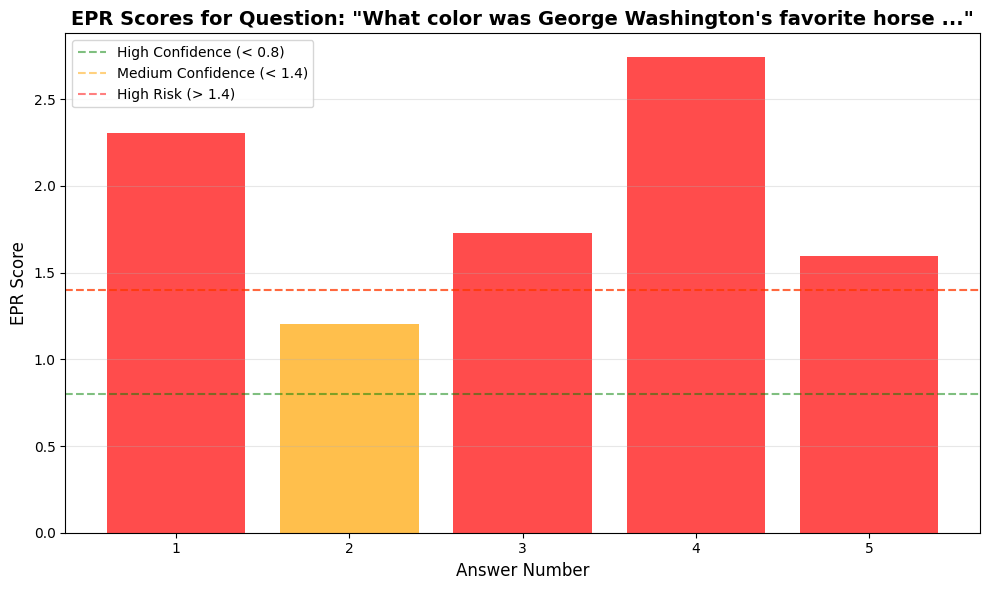


💡 Interpretation:
  Green:  High confidence - likely correct
  Orange: Medium confidence - verify if important
  Red:    Low confidence - high hallucination risk


In [54]:
# Bar plot of EPR scores
fig, ax = plt.subplots(figsize=(10, 6))

low_risk = 0.8
medium_risk = 1.4
high_risk = 1.4

colors = ["green" if s < low_risk else "orange" if s < medium_risk else "red" for s in epr_scores]
bars = ax.bar(range(1, len(epr_scores) + 1), epr_scores, color=colors, alpha=0.7)

# Add threshold lines
ax.axhline(y=low_risk, color="green", linestyle="--", alpha=0.5, label=f"High Confidence (< {low_risk})")
ax.axhline(y=medium_risk, color="orange", linestyle="--", alpha=0.5, label=f"Medium Confidence (< {medium_risk})")
ax.axhline(y=high_risk, color="red", linestyle="--", alpha=0.5, label=f"High Risk (> {high_risk})")

ax.set_xlabel("Answer Number", fontsize=12)
ax.set_ylabel("EPR Score", fontsize=12)
ax.set_title(f'EPR Scores for Question: "{QUESTION[:50]}..."', fontsize=14, fontweight="bold")
ax.set_xticks(range(1, len(epr_scores) + 1))
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Per-Token Entropy Analysis

Let's look at the entropy for each token in the first answer

In [55]:
# Select answer to analyze (change index to analyze different answers)
ANSWER_IDX = 0

selected_answer = outputs[0].outputs[ANSWER_IDX].text
selected_tokens_epr = token_epr_scores[ANSWER_IDX]


Analyzing Answer 1:
Text: Brown

Sequence EPR: 2.3032
Number of tokens: 2
Mean token EPR: 2.3032
Max token EPR: 3.6106 (most uncertain token)
Min token EPR: 0.9958 (most certain token)


### Token-by-Token EPR Visualization

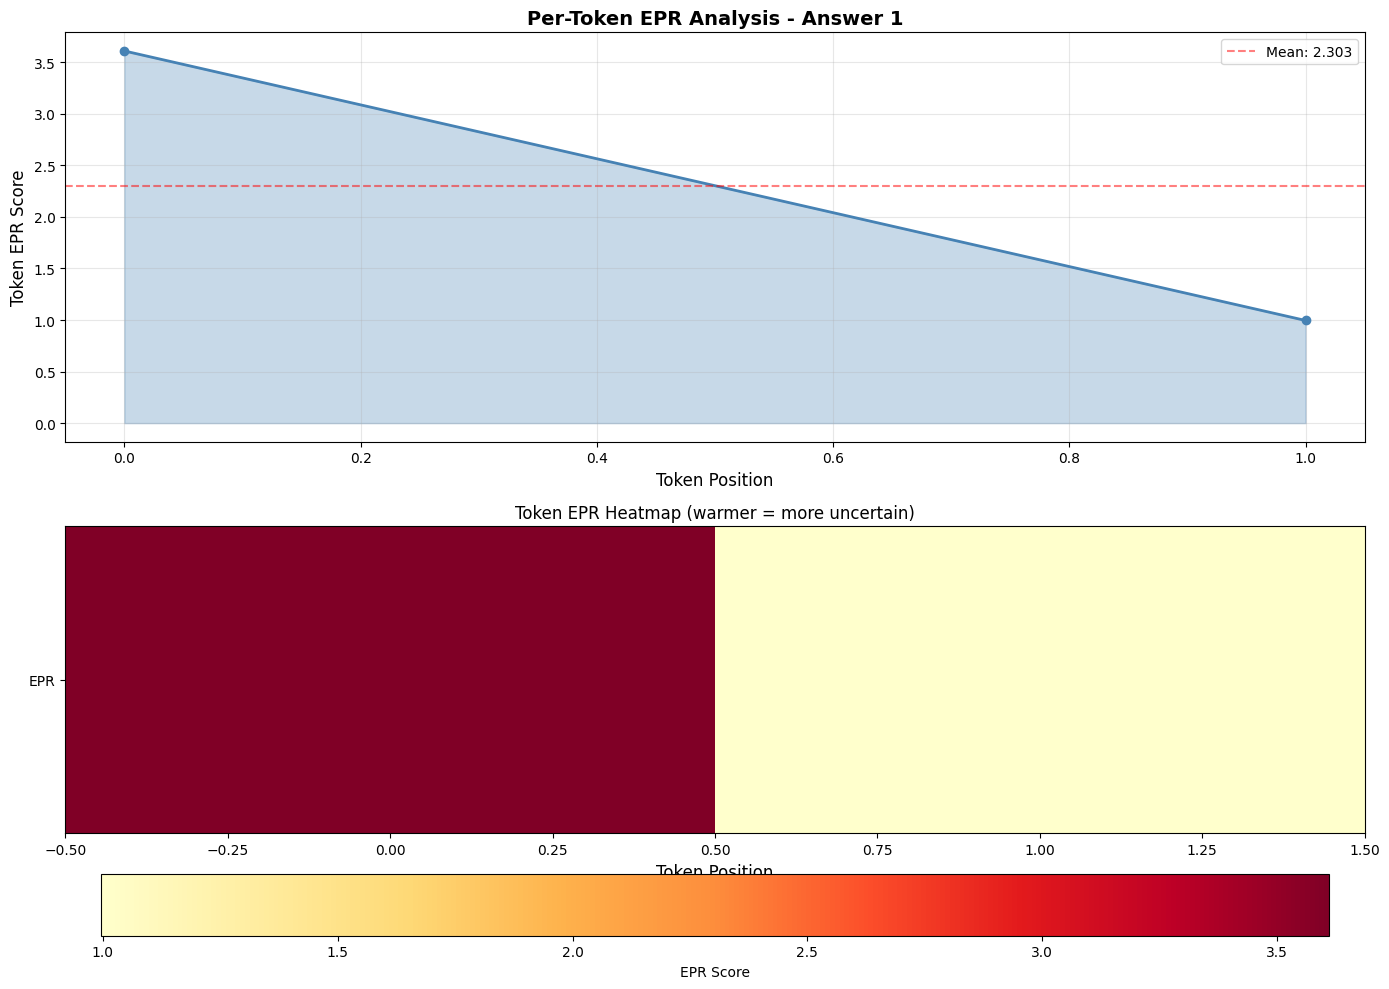

In [ ]:
# Extract token strings (decoded tokens)
token_logprobs = outputs[0].outputs[ANSWER_IDX].logprobs
tokens = [next(iter(token_dict.values())).decoded_token for token_dict in token_logprobs]

# Plot per-token EPR
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Line plot with markers
token_positions = range(len(selected_tokens_epr))
ax1.plot(token_positions, selected_tokens_epr, marker="o", linewidth=2, markersize=6, color="steelblue")

ax1.axhline(
    y=selected_tokens_epr.mean(),
    color="red", linestyle="--",
    alpha=0.5,
    label=f"Mean: {selected_tokens_epr.mean():.3f}")

ax1.fill_between(token_positions, 0, selected_tokens_epr, alpha=0.3, color="steelblue")

ax1.set_xlabel("Token Position", fontsize=12)
ax1.set_ylabel("Token EPR Score", fontsize=12)
ax1.set_title(f"Per-Token EPR Analysis - Answer {ANSWER_IDX + 1}", fontsize=14, fontweight="bold")
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Heatmap view
token_epr_2d = selected_tokens_epr.reshape(1, -1)
im = ax2.imshow(token_epr_2d, cmap="YlOrRd", aspect="auto", interpolation="nearest")
ax2.set_yticks([0])
ax2.set_yticklabels(["EPR"])
ax2.set_xlabel("Token Position", fontsize=12)
ax2.set_title("Token EPR Heatmap (warmer = more uncertain)", fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2, orientation="horizontal", pad=0.1)
cbar.set_label("EPR Score", fontsize=10)

plt.tight_layout()
plt.show()

### Show Tokens with Highest Uncertainty

In [57]:
# Find tokens with highest EPR
top_k_uncertain = 5
uncertain_indices = np.argsort(selected_tokens_epr)[-top_k_uncertain:][::-1]


for _rank, idx in enumerate(uncertain_indices, 1):
    token = tokens[idx]
    epr = selected_tokens_epr[idx]


TOP 5 MOST UNCERTAIN TOKENS
Rank   Position   Token                EPR Score   
--------------------------------------------------------------------------------
1      0          'Brown'              3.610594
2      1          ''                   0.995793

💡 High EPR tokens indicate where the model is most uncertain


## 7. Compare Multiple Questions

Try different types of questions to see how EPR varies

In [ ]:
# Define different types of questions
test_questions = [
    ("What is the capital of France?", "Easy Factual"),
    ("Who wrote Romeo and Juliet?", "Easy Factual"),
    ("What was Napoleon's third cousin's pet dog's name?", "Hallucination-Prone"),
    ("How many moons does Mercury have?", "Trick Question"),
    ("What color is a mirror?", "Counterintuitive"),
]

results = []


for question, category in test_questions:
    messages = [{"role": "user", "content": f"Answer concisely: {question}"}]

    params = SamplingParams(
        temperature=1.0,
        max_tokens=50,
        logprobs=K,
        n=3,  # Generate 3 answers per question
    )

    output = llm.chat(messages=messages, sampling_params=params, use_tqdm=False)
    scores, _ = detector.fit(output, return_tokens=True)

    mean_epr = np.mean(scores)
    results.append((question, category, mean_epr, scores))


Testing multiple questions...

✓ Easy Factual: 0.5436
✓ Easy Factual: 0.4477
✓ Hallucination-Prone: 1.9322
✓ Trick Question: 0.8247
✓ Counterintuitive: 1.4245

Done!


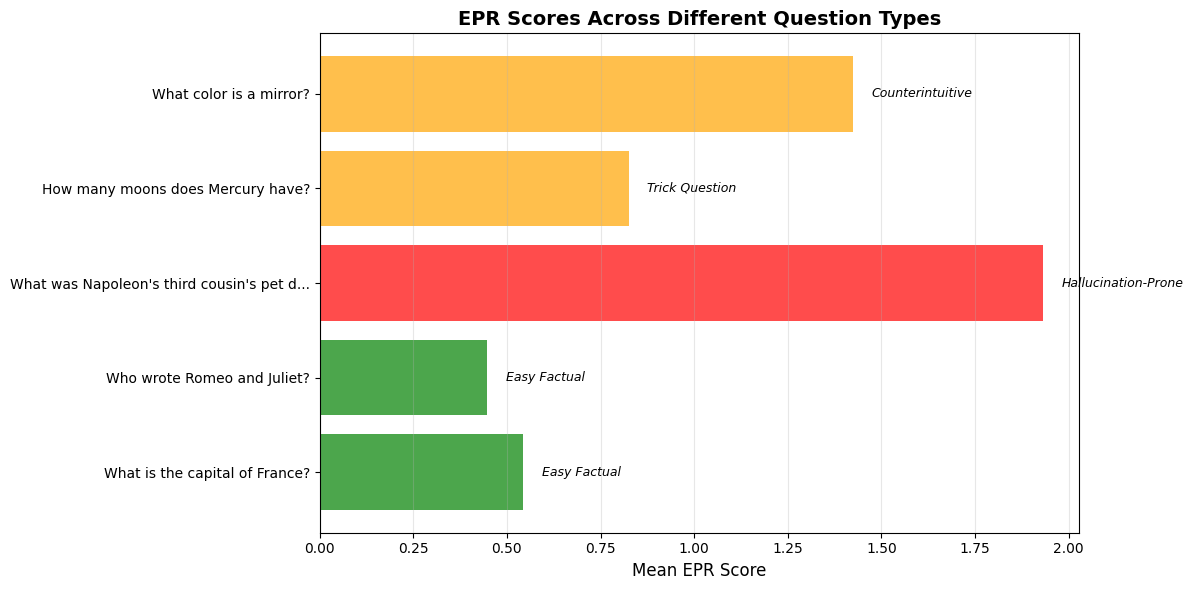


🎯 Observation: Hallucination-prone questions typically have higher EPR scores!


In [ ]:
MAX_LENGTH = 40

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

questions_short = [q[:MAX_LENGTH] + "..." if len(q) > MAX_LENGTH else q for q, _, _, _ in results]
mean_eprs = [mean_epr for _, _, mean_epr, _ in results]
categories = [cat for _, cat, _, _ in results]

# Color by category
color_map = {
    "Easy Factual": "green",
    "Trick Question": "orange",
    "Counterintuitive": "orange",
    "Hallucination-Prone": "red",
}
colors = [color_map.get(cat, "gray") for cat in categories]

bars = ax.barh(range(len(results)), mean_eprs, color=colors, alpha=0.7)

ax.set_yticks(range(len(results)))
ax.set_yticklabels(questions_short)
ax.set_xlabel("Mean EPR Score", fontsize=12)
ax.set_title("EPR Scores Across Different Question Types", fontsize=14, fontweight="bold")
ax.grid(axis="x", alpha=0.3)

# Add category labels
for i, (bar, cat) in enumerate(zip(bars, categories, strict=False)):
    width = bar.get_width()
    ax.text(width + 0.05, i, f"{cat}", va="center", fontsize=9, style="italic")

plt.tight_layout()
plt.show()

## 8. Summary & Interpretation

### EPR Score Interpretation Guide:

| EPR Range | Confidence Level | Interpretation |
|-----------|-----------------|----------------|
| < 0.3 | **High** | Model is confident, answer likely correct |
| 0.3 - 0.6 | **Medium** | Moderate uncertainty, verify if important |
| 0.6 - 1.0 | **Low** | High uncertainty, potential hallucination |
| > 1.0 | **Very Low** | Very uncertain, likely hallucination |

### Use Cases:

1. **Hallucination Detection**: Flag answers with high EPR for human review
2. **Confidence Filtering**: Only use answers below a certain EPR threshold
3. **Answer Ranking**: Sort multiple answers by EPR to find the most confident one
4. **Model Debugging**: Identify which types of questions cause high uncertainty

## 9. Try Your Own Experiments!

Now that you understand how EPR works, try:

1. **Different questions**: Modify `QUESTION` in cell 2
2. **Different K values**: Change the number of top logprobs considered
3. **Different temperatures**: See how temperature affects uncertainty
4. **Different models**: Compare EPR across different model sizes

Happy exploring! 🚀